Chapter 16

# 偏导
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码的核心任务是研究二维函数

$$
f(x, y) = 3(1 - x)^2 e^{-(x^2 + (y + 1)^2)} - 10\left(\frac{x}{5} - x^3 - y^5\right)e^{-(x^2 + y^2)} - \frac{1}{3} e^{-(x + 1)^2 - y^2}
$$

的导数特性，通过计算其一阶和二阶偏导数，并绘制函数曲面及各导数的三维图和等高线图来揭示其几何特性。具体而言，该代码主要通过以下几个步骤来分析函数 $f(x, y)$ 的变化趋势、平坦区域（驻点）、曲率和凹凸性。

1. **定义网格与函数**：
   - 首先，在区域 $[-3, 3] \times [-3, 3]$ 上创建了一个网格，然后计算 $f(x, y)$ 在网格上的值。这构成了分析的基础，通过图形来直观展示函数值在整个区域上的分布。

2. **计算一阶偏导数**：
   - 计算函数对 $x$ 和 $y$ 的一阶偏导数 $\frac{\partial f}{\partial x}$ 和 $\frac{\partial f}{\partial y}$。一阶偏导数可以表示函数在每个方向上的瞬时变化率，这帮助我们理解函数在不同位置的上升或下降趋势：
     $$
     \frac{\partial f}{\partial x} = \text{求导后的表达式}
     $$
     $$
     \frac{\partial f}{\partial y} = \text{求导后的表达式}
     $$
   - 通过绘制 $\frac{\partial f}{\partial x}$ 和 $\frac{\partial f}{\partial y}$ 的等高线图，其中偏导数为零的点（零等高线）对应于水平切平面的位置。这些零等高线的交点是函数的驻点，即函数在这些点上局部平坦，不随 $x$ 或 $y$ 的变化而增大或减小。

3. **计算二阶偏导数和曲率分析**：
   - 进一步计算二阶偏导数，包括：
     - $\frac{\partial^2 f}{\partial x^2}$：描述函数在 $x$ 方向的凹凸性，即函数的曲率。
     - $\frac{\partial^2 f}{\partial y^2}$：描述函数在 $y$ 方向的曲率。
     - $\frac{\partial^2 f}{\partial x \partial y}$：描述 $x$ 和 $y$ 之间的联合曲率。
   - 二阶偏导数的图像展示了曲面的凹凸性。正的二阶导数意味着函数在该方向上凹向上，而负的二阶导数则意味着凹向下。混合偏导数描述了 $x$ 和 $y$ 之间的相互作用，并对函数的极值有重要作用。

4. **驻点与零水平线的交点**：
   - 最后，通过将 $\frac{\partial f}{\partial x} = 0$ 和 $\frac{\partial f}{\partial y} = 0$ 的等高线叠加，可以找到驻点的位置。这些交点标识出可能的极值点或鞍点。通过图像，直观展示了函数在这些驻点附近的平坦性和曲率结构。

总体而言，这段代码展示了如何通过一阶和二阶偏导数的分析，来深入理解函数 $f(x, y)$ 的几何特性。等高线图和三维图像为理解函数的平稳性、局部极值及整体形状提供了可视化支持。

## 导入包

In [1]:
import numpy as np
from sympy import lambdify, diff, exp, latex  # 导入lambdify、求导、指数和latex格式化函数
from sympy.abc import x, y  # 导入符号变量 x 和 y
import matplotlib.pyplot as plt  # 导入绘图库 Matplotlib

## 定义网格和函数

In [2]:
num = 301  # 网格数
x_array = np.linspace(-3, 3, num)  # 定义 x 方向的网格范围
y_array = np.linspace(-3, 3, num)  # 定义 y 方向的网格范围
xx, yy = np.meshgrid(x_array, y_array)  # 创建二维网格

## 定义目标函数 f(x, y)

In [3]:
f_xy = 3 * (1 - x)**2 * exp(-x**2 - (y + 1)**2) \
    - 10 * (x / 5 - x**3 - y**5) * exp(-x**2 - y**2) \
    - 1/3 * exp(-(x + 1)**2 - y**2)
f_xy

3*(1 - x)**2*exp(-x**2 - (y + 1)**2) - (-10*x**3 + 2*x - 10*y**5)*exp(-x**2 - y**2) - 0.333333333333333*exp(-y**2 - (x + 1)**2)

In [4]:
f_xy_fcn = lambdify([x, y], f_xy)  # 将符号函数转换为数值函数
f_xy_zz = f_xy_fcn(xx, yy)  # 计算函数在网格上的值

## 计算对 x 的一阶偏导数

In [5]:
df_dx = f_xy.diff(x)  # 计算 f 对 x 的一阶偏导数
df_dx

-6*x*(1 - x)**2*exp(-x**2 - (y + 1)**2) + 2*x*(-10*x**3 + 2*x - 10*y**5)*exp(-x**2 - y**2) - (2 - 30*x**2)*exp(-x**2 - y**2) - 0.333333333333333*(-2*x - 2)*exp(-y**2 - (x + 1)**2) + 3*(2*x - 2)*exp(-x**2 - (y + 1)**2)

In [6]:
df_dx_fcn = lambdify([x, y], df_dx)  # 将偏导数转换为数值函数
df_dx_zz = df_dx_fcn(xx, yy)  # 计算偏导数在网格上的值

## 绘制一阶偏导数的 3D 图像

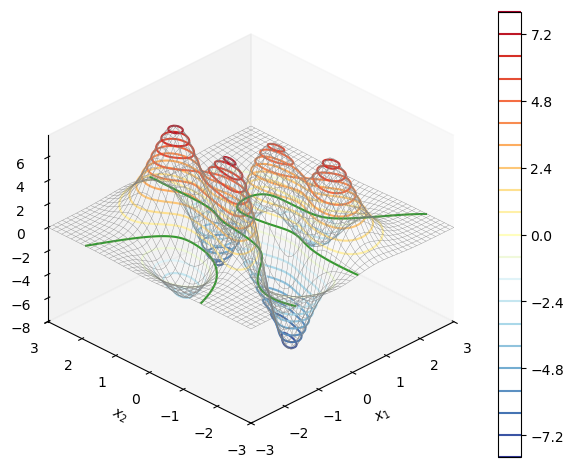

In [7]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})  # 创建三维绘图窗口

ax.plot_wireframe(xx, yy, df_dx_zz, color=[0.5, 0.5, 0.5], linewidth=0.25)  # 绘制偏导数的网格线框
colorbar = ax.contour(xx, yy, df_dx_zz, 20, cmap='RdYlBu_r')  # 绘制等高线并着色

ax.contour(xx, yy, df_dx_zz, levels=[0], colors='#339933', linestyles='-')  # 添加绿色等高线，表示 df/dx = 0 的区域

fig.colorbar(colorbar, ax=ax)  # 添加颜色条
ax.set_proj_type('ortho')  # 设置投影类型为正交
ax.set_xlabel('$x_1$')  # 设置 x 轴标签
ax.set_ylabel('$x_2$')  # 设置 y 轴标签
ax.set_zlabel('$f_{x1}(x_1,x_2)$')  # 设置 z 轴标签
plt.tight_layout()  # 紧凑布局
ax.set_xlim(xx.min(), xx.max())  # 设置 x 轴范围
ax.set_ylim(yy.min(), yy.max())  # 设置 y 轴范围
ax.view_init(azim=-135, elev=30)  # 设置视角
ax.grid(False)  # 关闭网格线
plt.show()  # 显示图像

## 绘制一阶偏导数的等高线图

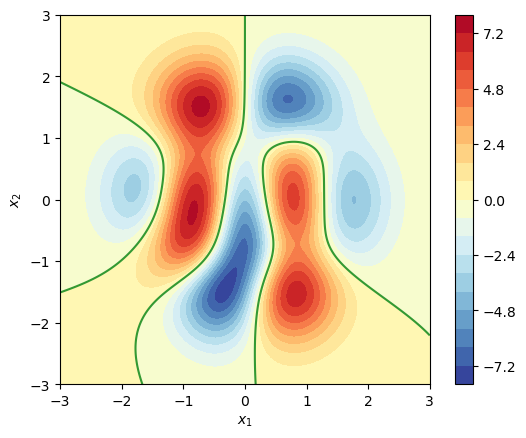

In [8]:
fig, ax = plt.subplots()  # 创建二维绘图窗口

colorbar = ax.contourf(xx, yy, df_dx_zz, 20, cmap='RdYlBu_r')  # 绘制等高填充图
ax.contour(xx, yy, df_dx_zz, levels=[0], colors='#339933', linestyles='-')  # 添加等高线，表示 df/dx = 0 的区域

fig.colorbar(colorbar, ax=ax)  # 添加颜色条
ax.set_xlim(xx.min(), xx.max())  # 设置 x 轴范围
ax.set_ylim(yy.min(), yy.max())  # 设置 y 轴范围
ax.set_xlabel('$x_1$')  # 设置 x 轴标签
ax.set_ylabel('$x_2$')  # 设置 y 轴标签
plt.gca().set_aspect('equal', adjustable='box')  # 设置图像比例
plt.show()  # 显示图像

## 计算对 y 的一阶偏导数

In [9]:
df_dy = f_xy.diff(y)  # 计算 f 对 y 的一阶偏导数
df_dy

50*y**4*exp(-x**2 - y**2) + 2*y*(-10*x**3 + 2*x - 10*y**5)*exp(-x**2 - y**2) + 0.666666666666667*y*exp(-y**2 - (x + 1)**2) + 3*(1 - x)**2*(-2*y - 2)*exp(-x**2 - (y + 1)**2)

In [10]:
df_dy_fcn = lambdify([x, y], df_dy)  # 将偏导数转换为数值函数
df_dy_zz = df_dy_fcn(xx, yy)  # 计算偏导数在网格上的值

## 绘制对 y 的一阶偏导数的 3D 图像

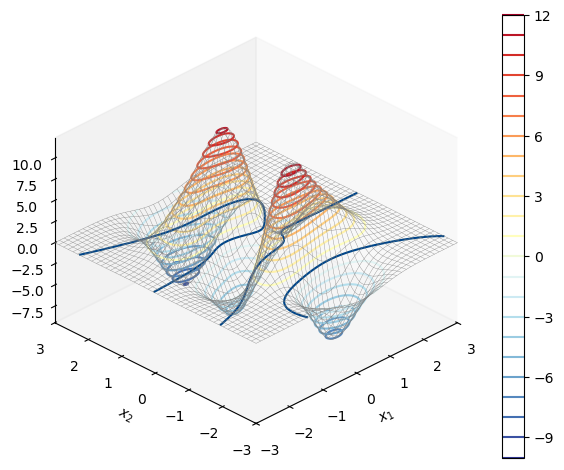

In [11]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})  # 创建三维绘图窗口

ax.plot_wireframe(xx, yy, df_dy_zz, color=[0.5, 0.5, 0.5], linewidth=0.25)  # 绘制偏导数的网格线框
colorbar = ax.contour(xx, yy, df_dy_zz, 20, cmap='RdYlBu_r')  # 绘制等高线并着色

ax.contour(xx, yy, df_dy_zz, levels=[0], colors='#00448A')  # 添加蓝色等高线，表示 df/dy = 0 的区域

fig.colorbar(colorbar, ax=ax)  # 添加颜色条
ax.set_proj_type('ortho')  # 设置投影类型为正交
ax.set_xlabel('$x_1$')  # 设置 x 轴标签
ax.set_ylabel('$x_2$')  # 设置 y 轴标签
ax.set_zlabel('$f_{x2}(x_1,x_2)$')  # 设置 z 轴标签
plt.tight_layout()  # 紧凑布局
ax.set_xlim(xx.min(), xx.max())  # 设置 x 轴范围
ax.set_ylim(yy.min(), yy.max())  # 设置 y 轴范围
ax.view_init(azim=-135, elev=30)  # 设置视角
ax.grid(False)  # 关闭网格线
plt.show()  # 显示图像

## 绘制对 y 的一阶偏导数的等高线图

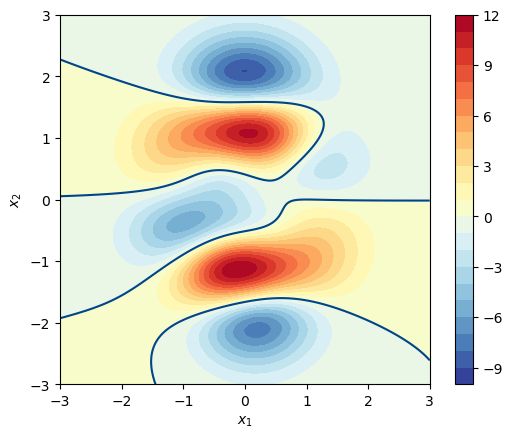

In [12]:
fig, ax = plt.subplots()  # 创建二维绘图窗口

colorbar = ax.contourf(xx, yy, df_dy_zz, 20, cmap='RdYlBu_r')  # 绘制等高填充图
ax.contour(xx, yy, df_dy_zz, levels=[0], colors='#00448A')  # 添加等高线，表示 df/dy = 0 的区域

fig.colorbar(colorbar, ax=ax)  # 添加颜色条
ax.set_xlim(xx.min(), xx.max())  # 设置 x 轴范围
ax.set_ylim(yy.min(), yy.max())  # 设置 y 轴范围
ax.set_xlabel('$x_1$')  # 设置 x 轴标签
ax.set_ylabel('$x_2$')  # 设置 y 轴标签
plt.gca().set_aspect('equal', adjustable='box')  # 设置图像比例
plt.show()  # 显示图像

## 二阶偏导数和曲面绘图函数定义

In [13]:
def plot_surface(xx, yy, surface, title_txt):
    fig = plt.figure(figsize=plt.figaspect(0.5))
    
    ax = fig.add_subplot(1, 2, 1, projection='3d')  # 3D 图像
    ax.plot_wireframe(xx, yy, surface, color=[0.5, 0.5, 0.5], linewidth=0.25)
    colorbar = ax.contour(xx, yy, surface, 20, cmap='RdYlBu_r')
    
    ax.set_proj_type('ortho')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel(title_txt)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.view_init(azim=-135, elev=30)
    ax.grid(False)

    ax = fig.add_subplot(1, 2, 2)  # 等高线图像
    colorbar = ax.contourf(xx, yy, surface, 20, cmap='RdYlBu_r')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    plt.gca().set_aspect('equal', adjustable='box')

## 计算并绘制二阶混合偏导数 d^2f/dxdy

In [14]:
d2f_dxdy = f_xy.diff(x, y)  # 计算 d^2f/dxdy
d2f_dxdy

-100*x*y**4*exp(-x**2 - y**2) + 8*x*y*(5*x**3 - x + 5*y**5)*exp(-x**2 - y**2) + 12*x*(x - 1)**2*(y + 1)*exp(-x**2 - (y + 1)**2) - 1.33333333333333*y*(x + 1)*exp(-y**2 - (x + 1)**2) - 4*y*(15*x**2 - 1)*exp(-x**2 - y**2) - 12*(x - 1)*(y + 1)*exp(-x**2 - (y + 1)**2)

In [15]:
d2f_dxdy_fcn = lambdify([x, y], d2f_dxdy)
d2f_dxdy_zz = d2f_dxdy_fcn(xx, yy)

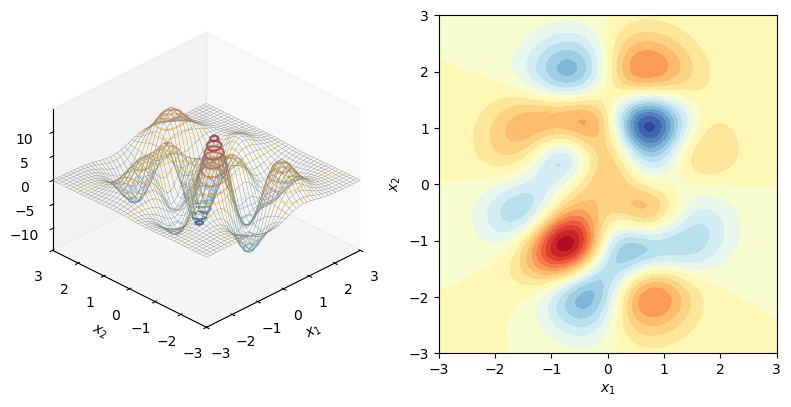

In [16]:
title_txt = '$f_{x1,x2}(x1,x2)$'
plot_surface(xx, yy, d2f_dxdy_zz, title_txt)

## 计算并绘制二阶偏导数 d^2f/dx^2

In [17]:
d2f_dxdx = f_xy.diff(x, 2)  # 计算 d^2f/dx^2
d2f_dxdx

12*x**2*(x - 1)**2*exp(-x**2 - (y + 1)**2) + 8*x**2*(5*x**3 - x + 5*y**5)*exp(-x**2 - y**2) - 24*x*(x - 1)*exp(-x**2 - (y + 1)**2) - 8*x*(15*x**2 - 1)*exp(-x**2 - y**2) + 60*x*exp(-x**2 - y**2) - 6*(x - 1)**2*exp(-x**2 - (y + 1)**2) - 1.33333333333333*(x + 1)**2*exp(-y**2 - (x + 1)**2) - 4*(5*x**3 - x + 5*y**5)*exp(-x**2 - y**2) + 6*exp(-x**2 - (y + 1)**2) + 0.666666666666667*exp(-y**2 - (x + 1)**2)

In [18]:
d2f_dxdx_fcn = lambdify([x, y], d2f_dxdx)
d2f_dxdx_zz = d2f_dxdx_fcn(xx, yy)

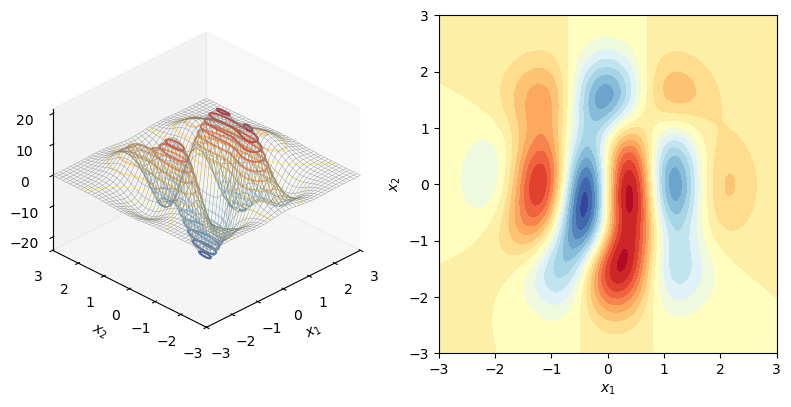

In [19]:
title_txt = '$f_{x1,x1}(x1,x2)$'
plot_surface(xx, yy, d2f_dxdx_zz, title_txt)

## 计算并绘制二阶偏导数 d^2f/dy^2

In [20]:
d2f_dydy = f_xy.diff(y, 2)  # 计算 d^2f/dy^2
d2f_dydy

-200*y**5*exp(-x**2 - y**2) + 200*y**3*exp(-x**2 - y**2) + 8*y**2*(5*x**3 - x + 5*y**5)*exp(-x**2 - y**2) - 1.33333333333333*y**2*exp(-y**2 - (x + 1)**2) + 12*(x - 1)**2*(y + 1)**2*exp(-x**2 - (y + 1)**2) - 6*(x - 1)**2*exp(-x**2 - (y + 1)**2) - 4*(5*x**3 - x + 5*y**5)*exp(-x**2 - y**2) + 0.666666666666667*exp(-y**2 - (x + 1)**2)

In [21]:
d2f_dydy_fcn = lambdify([x, y], d2f_dydy)
d2f_dydy_zz = d2f_dydy_fcn(xx, yy)

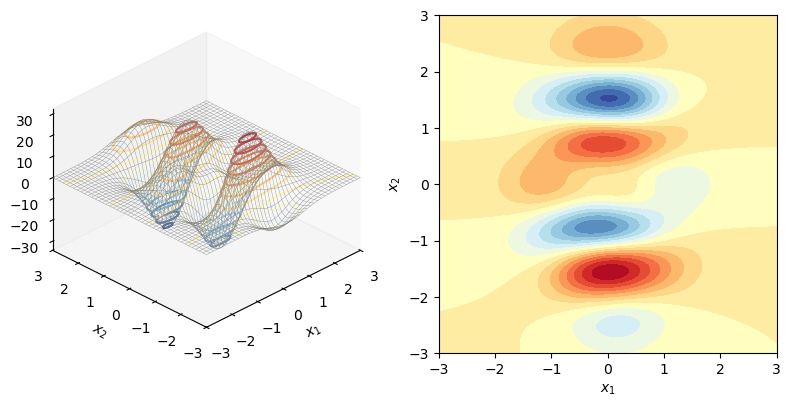

In [22]:
title_txt = '$f_{x2,x2}(x1,x2)$'
plot_surface(xx, yy, d2f_dydy_zz, title_txt)

## 绘制函数的等高线图和一阶偏导数的零等高线

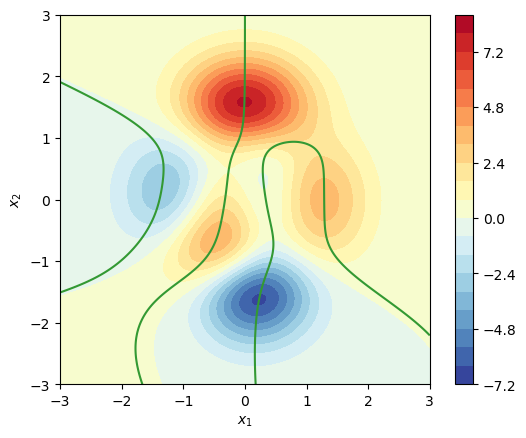

In [23]:
fig, ax = plt.subplots()  # 创建二维绘图窗口

colorbar = ax.contourf(xx, yy, f_xy_zz, 20, cmap='RdYlBu_r')  # 绘制 f(x, y) 的等高填充图
fig.colorbar(colorbar, ax=ax)  # 添加颜色条

ax.contour(xx, yy, df_dx_zz, levels=[0], colors='#339933')  # 在等高线图上添加 df/dx = 0 的等高线
ax.set_xlim(xx.min(), xx.max())  # 设置 x 轴范围
ax.set_ylim(yy.min(), yy.max())  # 设置 y 轴范围
ax.set_xlabel('$x_1$')  # 设置 x 轴标签
ax.set_ylabel('$x_2$')  # 设置 y 轴标签
plt.gca().set_aspect('equal', adjustable='box')  # 设置图像比例
plt.show()  # 显示图像

## 绘制另一幅包含等高线和零等高线的图

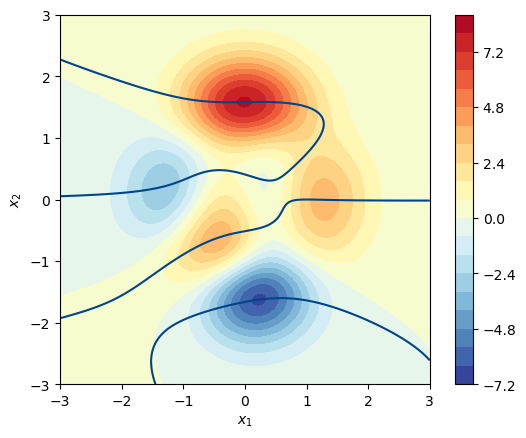

In [24]:
fig, ax = plt.subplots()  # 创建二维绘图窗口

colorbar = ax.contourf(xx, yy, f_xy_zz, 20, cmap='RdYlBu_r')  # 绘制 f(x, y) 的等高填充图
fig.colorbar(colorbar, ax=ax)  # 添加颜色条

ax.contour(xx, yy, df_dy_zz, levels=[0], colors='#00448A')  # 在等高线图上添加 df/dy = 0 的等高线
ax.set_xlim(xx.min(), xx.max())  # 设置 x 轴范围
ax.set_ylim(yy.min(), yy.max())  # 设置 y 轴范围
ax.set_xlabel('$x_1$')  # 设置 x 轴标签
ax.set_ylabel('$x_2$')  # 设置 y 轴标签
plt.gca().set_aspect('equal', adjustable='box')  # 设置图像比例
plt.show()  # 显示图像

## 查找驻点和零水平线交点

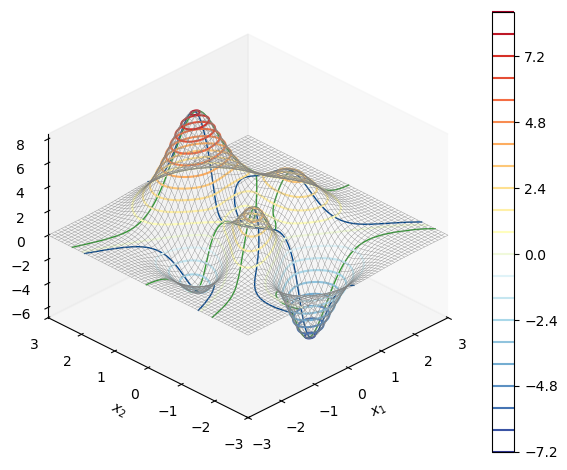

In [25]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})  # 创建三维绘图窗口

CS_y = ax.contour(xx, yy, df_dy_zz, levels=[0], colors='#339933')  # 计算并绘制 df/dy = 0 的等高线
CS_x = ax.contour(xx, yy, df_dx_zz, levels=[0], colors='#339933')  # 计算并绘制 df/dx = 0 的等高线
ax.cla()  # 清空图像

ax.plot_wireframe(xx, yy, f_xy_zz, color=[0.5, 0.5, 0.5], rstride=5, cstride=5, linewidth=0.25)  # 绘制 f(x, y) 的网格线框
colorbar = ax.contour(xx, yy, f_xy_zz, 20, cmap='RdYlBu_r')  # 绘制等高线并着色

fig.colorbar(colorbar, ax=ax)  # 添加颜色条

# 绘制 df/dy = 0 等高线
for i in range(0, len(CS_y.allsegs[0])):
    contour_points_x_y = CS_y.allsegs[0][i]  # 获取等高线的 x 和 y 坐标点
    contour_points_z = f_xy_fcn(contour_points_x_y[:, 0], contour_points_x_y[:, 1])  # 计算等高线点对应的 z 值
    ax.plot3D(contour_points_x_y[:, 0], contour_points_x_y[:, 1], contour_points_z, color='#339933', linewidth=1)

# 绘制 df/dx = 0 等高线
for i in range(0, len(CS_x.allsegs[0])):
    contour_points_x_y = CS_x.allsegs[0][i]  # 获取等高线的 x 和 y 坐标点
    contour_points_z = f_xy_fcn(contour_points_x_y[:, 0], contour_points_x_y[:, 1])  # 计算等高线点对应的 z 值
    ax.plot3D(contour_points_x_y[:, 0], contour_points_x_y[:, 1], contour_points_z, color='#00448A', linewidth=1)

ax.set_proj_type('ortho')  # 设置正交投影
ax.set_xlabel('$x_1$')  # 设置 x 轴标签
ax.set_ylabel('$x_2$')  # 设置 y 轴标签
ax.set_zlabel('$f(x_1,x_2)$')  # 设置 z 轴标签

ax.set_xlim(xx.min(), xx.max())  # 设置 x 轴范围
ax.set_ylim(yy.min(), yy.max())  # 设置 y 轴范围
ax.view_init(azim=-135, elev=30)  # 设置视角
plt.tight_layout()  # 紧凑布局
ax.grid(False)  # 关闭网格线
plt.show()  # 显示图像

## 绘制驻点等高线的二维图

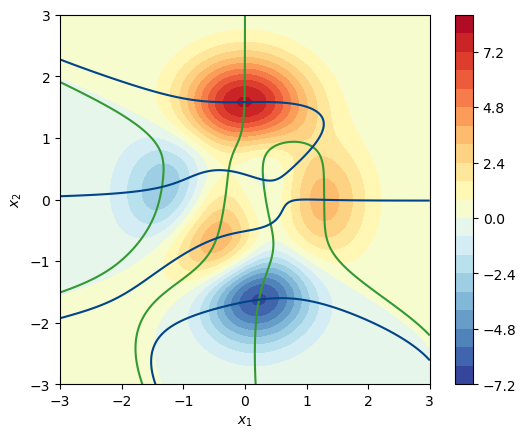

In [26]:
fig, ax = plt.subplots()  # 创建二维绘图窗口

colorbar = ax.contourf(xx, yy, f_xy_zz, 20, cmap='RdYlBu_r')  # 绘制 f(x, y) 的等高填充图
fig.colorbar(colorbar, ax=ax)  # 添加颜色条

ax.contour(xx, yy, df_dx_zz, levels=[0], colors='#339933', linestyles='-')  # 绘制 df/dx = 0 的绿色等高线
ax.contour(xx, yy, df_dy_zz, levels=[0], colors='#00448A', linestyles='-')  # 绘制 df/dy = 0 的蓝色等高线

ax.set_xlim(xx.min(), xx.max())  # 设置 x 轴范围
ax.set_ylim(yy.min(), yy.max())  # 设置 y 轴范围
ax.set_xlabel('$x_1$')  # 设置 x 轴标签
ax.set_ylabel('$x_2$')  # 设置 y 轴标签
plt.gca().set_aspect('equal', adjustable='box')  # 设置图像比例
plt.show()  # 显示图像